# **Online Retail ETL**

## Objectives

**ETL for the Online Retail Transaction Analysis**

Notebook objectives:
* Fetch data from Kaggle and save as raw data
* Engineer features such as the Sales value from the Quantity and Unit Price

## Inputs

* Data source: https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset 

## Outputs

* retail_processed.csv will be generated by the end of the notebook 

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\marka\\ILP_Retail\\ILP-Retail\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\marka\\ILP_Retail\\ILP-Retail'

# Load data

Section 1 content

In [7]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
import numpy as np
import pandas as pd

# Dataset Downloaded from Kaggle:
# Data source: https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset 
# The file is in the Datasets/Raw folder as Dataset/Raw/retail_raw.csv


In [8]:
# Load dataset into pandas
df = pd.read_csv(f"C:\\Users\\marka\\.cache\\kagglehub\\datasets\\abhishekrp1517\\online-retail-transactions-dataset\\versions\\2\\Online Retail.csv")  # replace with actual CSV filename


print("First 5 records:", df.head())


First 5 records:   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom  


---

# Create Sales from Quantity * UnitPrice
# Check for duplicates and drop these


In [9]:
# Create Sales from Quantity * UnitPrice
df['Sales'] = df['Quantity'] * df['UnitPrice']

# check for duplicates
duplicates = df[df.duplicated()]
# print("Duplicate records:", duplicates)

# drop duplicates
df = df.drop_duplicates()

# recheck for duplicates
#duplicates = df[df.duplicated()]
#print("Duplicate records:", duplicates)

# check for missing values by column
missing_values = df.isnull().sum()
print("Missing values by column:", missing_values)
# description has missing values but we can fill with 'No descriptipn'
df['Description'] = df['Description'].fillna("No description")

# recheck for missing values by column
#missing_values = df.isnull().sum()
#print("Missing values by column:", missing_values)


Missing values by column: InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Sales             0
dtype: int64


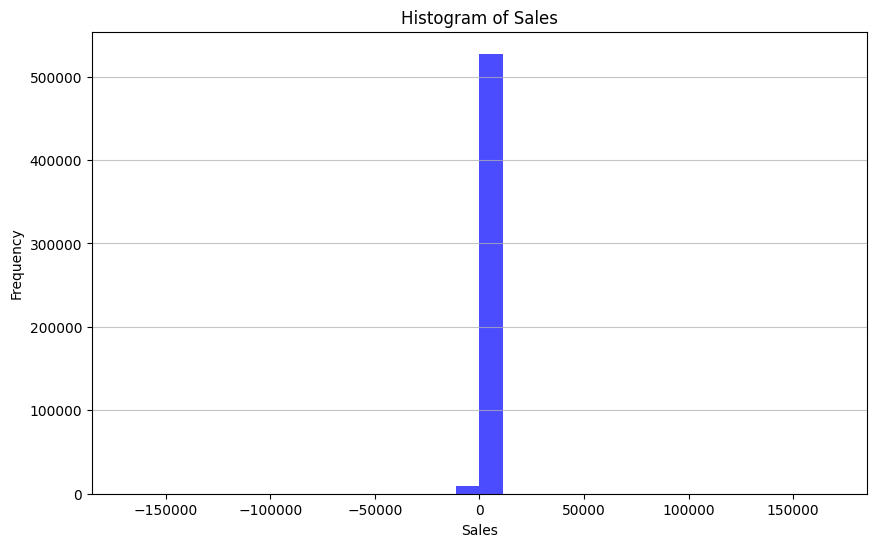

In [10]:
# a matplotlib histogram of Sales
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['Sales'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# we have outliers in the Sales data
lower_bound = -50000
upper_bound = 50000
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]

print("Outliers in Sales:", outliers)
# These are large quantity outliers which have been cancelled
# We could  drop these outliers
# df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]
# There are other negative Sales values which are cancellations

Outliers in Sales:        InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624    C541433     23166  MEDIUM CERAMIC TOP STORAGE JAR    -74215   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   
540422   C581484     23843     PAPER CRAFT , LITTLE BIRDIE    -80995   

                InvoiceDate  UnitPrice  CustomerID         Country     Sales  
61619   2011-01-18 10:01:00       1.04       12346  United Kingdom   77183.6  
61624   2011-01-18 10:17:00       1.04       12346  United Kingdom  -77183.6  
540421  2011-12-09 09:15:00       2.08       16446  United Kingdom  168469.6  
540422  2011-12-09 09:27:00       2.08       16446  United Kingdom -168469.6  


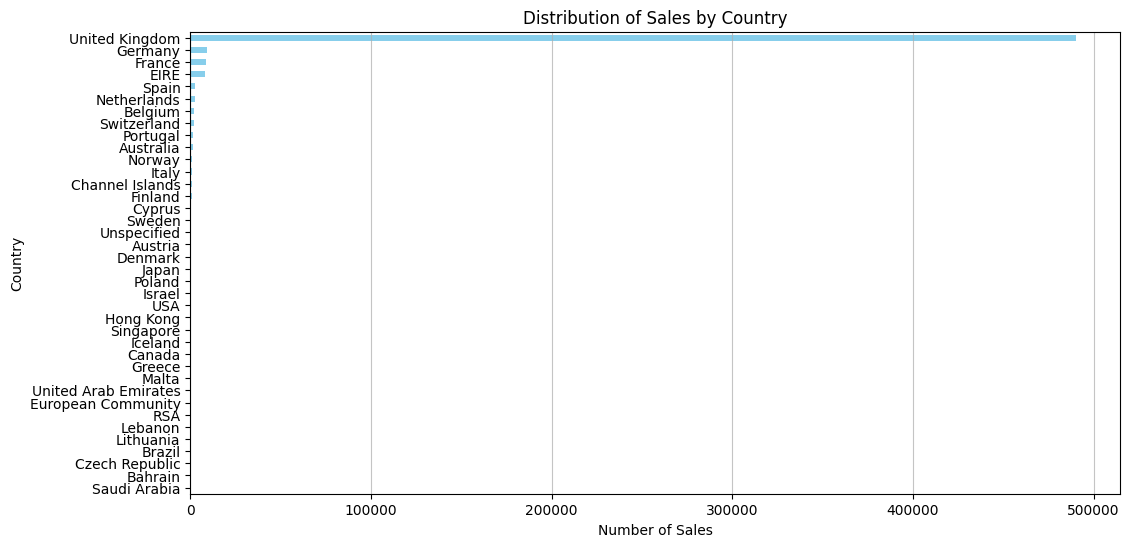

In [13]:
# what is the distribution by number of transactions by Country?
# sorted high to low on Number of Sales
country_sales = df['Country'].value_counts().sort_values(ascending=True)
# plot the distribution
plt.figure(figsize=(12,6))
country_sales.plot(kind='barh', color='skyblue')
plt.title('Distribution of Sales by Country')
plt.xlabel('Number of Sales')
plt.ylabel('Country')
plt.grid(axis='x', alpha=0.75)
plt.show()

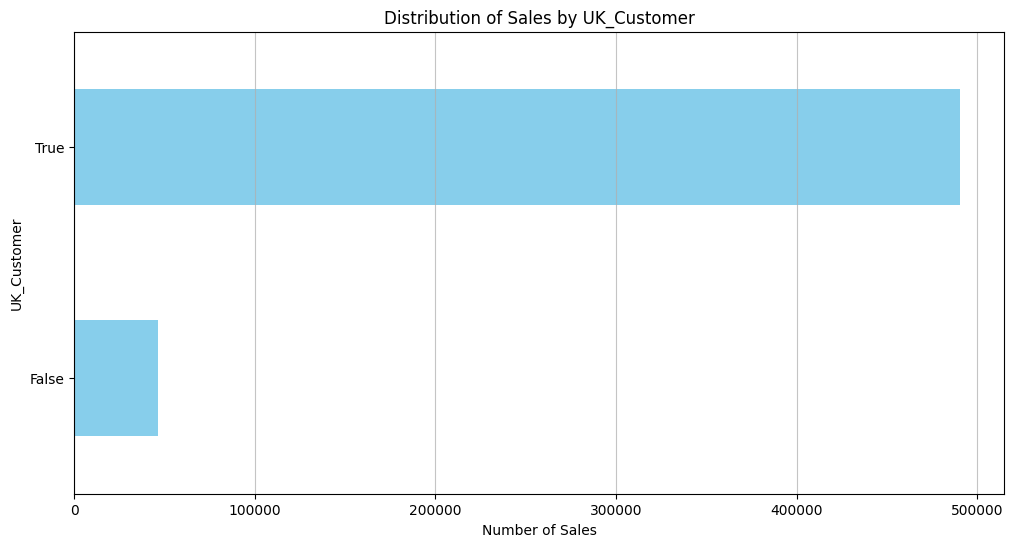

In [14]:
# As the UK is dominant we will introduce a flag for UK customers
df['UK_Customer'] = df['Country'] == 'United Kingdom'

# show the UK_Customer column as a table with counts
UK_vs_ROW_sales = df['UK_Customer'].value_counts().sort_values(ascending=True)
UK_vs_ROW_sales

country_sales = df['UK_Customer'].value_counts().sort_values(ascending=True)
# plot the distribution
plt.figure(figsize=(12,6))
country_sales.plot(kind='barh', color='skyblue')
plt.title('Distribution of Sales by UK_Customer')
plt.xlabel('Number of Sales')
plt.ylabel('UK_Customer')
plt.grid(axis='x', alpha=0.75)
plt.show()

In [15]:
# No longer taking this approach - this may be a future avenue of analysis 

# Identify the negative sales as Cancels and set Sales to zero and Cancels to the absolute value
# We may want to analyze the the Cancellations later

#df.loc[df['Sales'] < 0, 'Cancels'] = np.abs(df['Sales'])

#df.loc[df['Sales'] < 0, 'Sales']  = 0
df.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
Sales          float64
UK_Customer       bool
dtype: object

Find and remove the Cancelled invoices (Credit Notes)
These are when InvoiceNo starting with "C"
Extract their matching original invoice numbers.
Build a set containing both the original and cancelled note numbers.
Drop all rows where InvoiceNo is in that set.
This way, if an order was cancelled, do not include the sale or the cancellation in the cleaned dataset.

(Method - using ideation with Copilot)

In [16]:
import pandas as pd

# Ensure InvoiceNo is string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Identify credit notes
credit_notes = df[df['InvoiceNo'].str.startswith('C')].copy()

# Extract the numeric invoice number (removing the 'C')
credit_notes['OriginalInvoiceNo'] = credit_notes['InvoiceNo'].str[1:]

# Create a set of all invoice numbers involved in cancellations
cancelled_invoices = set(credit_notes['OriginalInvoiceNo']) | set(credit_notes['InvoiceNo'])

# Remove all matching invoices (both the original and the credit note)
df_clean = df[~df['InvoiceNo'].isin(cancelled_invoices)].reset_index(drop=True)

print(f"Removed {len(df) - len(df_clean)} rows related to cancellations.")


Removed 9251 rows related to cancellations.


In [17]:
# Are there any negative quantities still?
(df_clean['Quantity'] < 0).any()
df_clean[df_clean['Quantity'] < 0].head(50)
# They seem to all have 0 UnitPrice
(df_clean[df_clean['Quantity'] < 0]['UnitPrice'] == 0).all()
# drop these records
df_clean = df_clean[~(df_clean['Quantity'] < 0)]

# are there any negative prices?
(df_clean['UnitPrice'] < 0).any()

#df_clean[df_clean['UnitPrice'] < 0].head()

# remove these 'Adjust bad debt' rows - they are StockCode B, Adjust bad debt
df_clean = df_clean[df_clean['UnitPrice'] >= 0]
df_clean[df_clean['UnitPrice'] < 0].head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,UK_Customer


In [86]:
# Save the cleaned data to a new CSV file in the Datasets\Processed folder
df_clean.to_csv("C:\\Users\\marka\\ILP_Retail\\ILP-Retail\\Dataset\\Processed\\retail_processed.csv", index=False)


---

# Conclusions and Next Steps

The Online Retail data requires transformations in order to gain better insights.

For example, there are many Invoices which have been cancelled and therefore the resulting sales is zero.
These have been removed.

For machine learning later the categorical fields will benefit from label encoding.